# Clustering

Assignment :

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer 1 : K-Means is a top-down approach that partitions data into a specific
number of groups. It’s fast, efficient, and best for large datasets where you have a general idea of how many groups you need.

Hierarchical Clustering is a bottom-up approach that builds a nested tree of relationships. It is slower and computationally heavy, but it reveals the internal structure and "sub-groups" within your data.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer 2 : The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

How it WorksThe score ranges from -1 to +1:
* +1 (Near): The data point is far away from neighboring clusters and very close to its assigned group (perfect clustering).
* 0: The point is on or very close to the decision boundary between two neighboring clusters.
* -1: The point is likely assigned to the wrong cluster.

The Purpose
* Measuring Cluster Quality: It tells you how "dense" and "well-separated" your clusters are without needing labeled data.
* Finding the Optimal $k$: Unlike the Elbow Method (which looks at internal distance only), the Silhouette Score helps you find the $k$ that creates the most distinct, non-overlapping groups.
* Detecting Overlap: It identifies if clusters are bleeding into each other, which might suggest you need a different algorithm or more feature engineering.

Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

Answer 3 : DBSCAN (Density-Based Spatial Clustering of Applications with Noise) relies on two primary parameters that define how the algorithm perceives "density."1 Getting these right is the difference between finding meaningful patterns and seeing everything as noise.
1)  Epsilon (3$\epsilon$ or eps)This is the maximum distance between two points for them to be considered neighbors.
* Small $\epsilon$: The algorithm becomes very strict. It may fail to connect points into clusters, leading to a large number of points labeled as "noise.

*  "Large $\epsilon$: The neighborhood is too wide. This often causes distinct clusters to merge into one giant, less meaningful group.

2)  Minimum Points (minPts or min_samples)7This is the minimum number of points required within an 8$\epsilon$-radius to define a "dense" region (a Core Point).Small minPts (e.g., 1 or 2): The algorithm behaves like Hierarchical Clustering and won't filter out much noise.10Large minPts: The algorithm becomes more robust against outliers but requires much denser data to form a cluster. This is useful for noisy datasets.

Question 4: Why is feature scaling important when applying clustering algorithms like
K-Means and DBSCAN?

Answer 4 : Feature scaling is essential because both K-Means and DBSCAN rely on distance calculations (usually Euclidean distance) to determine the similarity between data points.

Specific Impact on Algorithms

* K-Means: The algorithm tries to minimize the distance between points and their cluster center (centroid).4 Without scaling, the "Income" dimension would be given thousands of times more weight than "Age."5 The clusters would effectively only be based on income, making the age data irrelevant.

* DBSCAN: This algorithm uses a distance parameter called Epsilon (6$\epsilon$).7 If your features aren't scaled, it is nearly impossible to choose a single $\epsilon$ value that works for all dimensions. A "small" distance in income might be $500, while a "small" distance in age is 1 year. Without scaling, the algorithm cannot "see" the density of the smaller-scale features.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer 5 : The Elbow Method is a heuristic used to find the optimal number of clusters (1$k$) by identifying the point of "diminishing returns" in a K-Means model.
How It Works

1) Calculate WCSS: You run K-Means multiple times, increasing 3$k$ each time (e.g., from 1 to 10).4 For each 5$k$, you calculate the Within-Cluster Sum of Squares (WCSS)—also known as Inertia.WCSS is the sum of the squared distances between each data point and its assigned cluster center (centroid).
2) Plot the Results: You create a line graph with the Number of Clusters (8$k$) on the x-axis and the WCSS on the y-axis.
3) Identify the "Elbow": As 10$k$ increases, WCSS will always decrease because more clusters allow for tighter groupings.11 However, at a certain point, the rate of decrease drops sharply, creating a visible "bend" or "elbow" in the graph.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.

Answer 6 : Part 1: Synthetic Blobs (K-Means)
This code generates 300 data points grouped into 4 distinct clusters and applies the K-Means algorithm to find them.


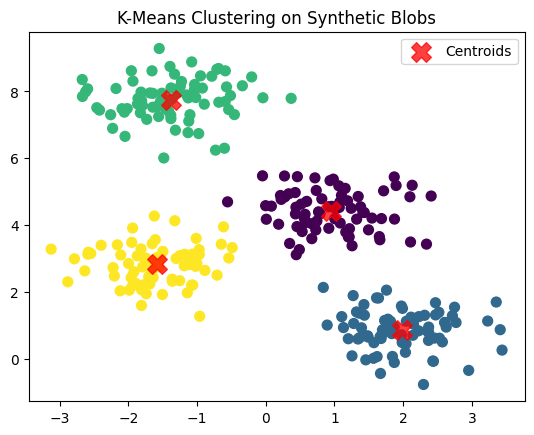

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 1. Generate synthetic blob data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# 2. Apply KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Visualize
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering on Synthetic Blobs")
plt.legend()
plt.show()

Part 2: Non-Linear Shapes (make_moons)
K-Means often fails on complex shapes like the "moons" dataset because it looks for spherical clusters. For this, DBSCAN or Spectral Clustering is usually preferred.

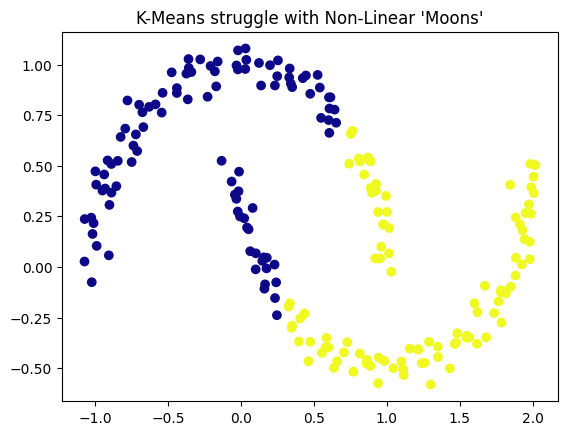

In [2]:
from sklearn.datasets import make_moons

# Generate moon-shaped data
X_moons, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Apply KMeans (demonstrating why it struggles with this shape)
km_moons = KMeans(n_clusters=2, n_init=10).fit_predict(X_moons)

plt.scatter(X_moons[:, 0], X_moons[:, 1], c=km_moons, cmap='plasma')
plt.title("K-Means struggle with Non-Linear 'Moons'")
plt.show()

Part 3: Real-World Data (load_wine)
When working with the Wine dataset, remember that Feature Scaling (as discussed in Question 4) is critical because the features (alcohol, magnesium, etc.) have very different ranges.

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

# 1. Load data
data = load_wine()
X_wine = data.data

# 2. Scale the data (Crucial step!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_wine)

# 3. Apply KMeans
kmeans_wine = KMeans(n_clusters=3, n_init=10, random_state=42)
clusters_wine = kmeans_wine.fit_predict(X_scaled)

print(f"Wine data clustered into {len(set(clusters_wine))} groups.")

Wine data clustered into 3 groups.


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).

Answer 7 : To complete this task, we will load the Wine dataset, scale the features to ensure equal importance, and apply DBSCAN.

Unlike K-Means, DBSCAN does not require us to specify the number of clusters. Instead, it determines them based on the density of the points.

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Apply StandardScaler (Essential for distance-based DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train the DBSCAN model
# We choose eps=2.5 and min_samples=5 as a starting point for this dataset
dbscan = DBSCAN(eps=2.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# 4. Count the number of clusters found (excluding noise)
# Noise points are labeled as -1 in DBSCAN
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}" )

Number of clusters found: 1
Number of noise points: 24


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

Answer 8 : To visualize how DBSCAN excels at identifying non-linear shapes and outliers, we will use the make_moons dataset. This dataset is a classic example of where density-based clustering succeeds while K-Means fails.

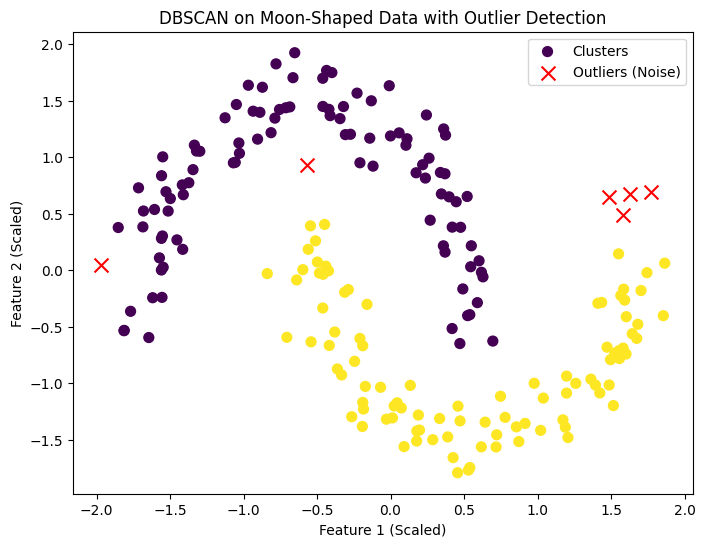

In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generate moon-shaped data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Scale data (Important for DBSCAN)
X_scaled = StandardScaler().fit_transform(X)

# 3. Apply DBSCAN
# eps: distance to neighbors; min_samples: points to form a core group
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Visualization
plt.figure(figsize=(8, 6))

# Plot clusters (where label is not -1)
plt.scatter(X_scaled[labels != -1, 0], X_scaled[labels != -1, 1],
            c=labels[labels != -1], cmap='viridis', s=50, label='Clusters')

# Highlight outliers (where label is -1)
plt.scatter(X_scaled[labels == -1, 0], X_scaled[labels == -1, 1],
            c='red', marker='x', s=100, label='Outliers (Noise)')

plt.title("DBSCAN on Moon-Shaped Data with Outlier Detection")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.show()

Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot

Answer 9: To visualize the clustering structure of the Wine dataset, we use PCA (Principal Component Analysis) to compress the 13 chemical features into two dimensions. We then apply Agglomerative Clustering, which is a "bottom-up" hierarchical approach.

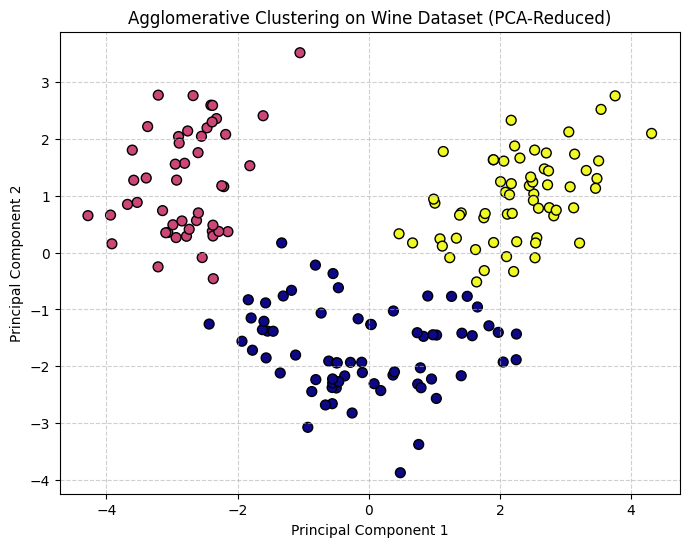

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load the Wine dataset
wine = load_wine()
X = wine.data

# 2. Scale the data (Crucial for PCA and Clustering)
X_scaled = StandardScaler().fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
# We specify 3 clusters as we know there are 3 wine classes
agg_clustering = AgglomerativeClustering(n_clusters=3)
labels = agg_clustering.fit_predict(X_pca)

# 5. Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50, edgecolors='k')
plt.title("Agglomerative Clustering on Wine Dataset (PCA-Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.

Describe your real-world data science workflow using clustering:

● Which clustering algorithm(s) would you use and why?

● How would you preprocess the data (missing values, scaling)?

● How would you determine the number of clusters?

● How would the marketing team benefit from your clustering analysis?

Answer 10 : In a professional e-commerce setting, the goal is to transform raw transaction data into actionable "Personas." Here is the workflow I would implement:

1. Preprocessing: Preparing the Foundation
Raw data is rarely ready for algorithms. My first steps would be:

* Feature Engineering: I would create an RFM (Recency, Frequency, Monetary) model. This simplifies purchase history into three key metrics per customer.

* Handling Missing Values: If demographics (like Age) are missing, I would use Median Imputation. If purchase history is missing for a record, I would likely drop it to ensure segment accuracy.

* Scaling: As discussed in Question 4, scaling is mandatory. I would use StandardScaler to ensure that "Total Spend" (thousands of dollars) doesn't drown out "Number of Visits" (small integers).

2. Choosing the Algorithm
I would primarily use K-Means Clustering for the following reasons:

* Scalability: E-commerce datasets are often large; K-Means is computationally efficient.

* Interpretability: It creates distinct groups that are easy to explain to stakeholders (e.g., "This is the High-Value group").

* Alternative: If the data shows irregular density or many outliers, I might use DBSCAN to identify "atypical" shoppers who don't fit standard patterns.

3. Determining the Number of Clusters ($k$)
To ensure the segments are mathematically sound, I would use a two-pronged approach:
* The Elbow Method: I’d plot the WCSS to find where adding more clusters stops providing significant value.
* Silhouette Analysis: I would verify the $k$ from the Elbow Method with a Silhouette Score to ensure the clusters are well-separated and not overlapping.

4. Marketing Team Benefits
The final output isn't just a list of numbers; it’s a strategy:

* Tailored Promotions: Instead of a "one-size-fits-all" 10% coupon, the team can send "Buy 1 Get 1" deals to frequent low-spenders and "Early Access to Luxury Collections" to high-monetary customers.

* Churn Prevention: We can identify a "At Risk" cluster (low recency) and trigger automated "We Miss You" emails before they stop shopping entirely.

* Product Recommendations: By clustering based on categories, the team can discover that "New Parents" also frequently buy "Home Cleaning Supplies," allowing for better cross-selling.